# Q5 SHAP

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import pickle
import missingno as msno
import shap
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=sys.maxsize)
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from scipy.stats import zscore

In [2]:
shap.initjs()

In [22]:
preprocessor = pickle.load(open('Q4_onehot_encoder.pkl','rb'))
xgb_pipeline = pickle.load(open('Q4_best_xgb_pipeline.pkl','rb'))
xgb_classifier = pickle.load(open('Q4_best_xgb.pkl','rb'))
X_test = pickle.load(open('Q2_test.pkl','rb'))

pd_model = pickle.load(open('Q3_pd_model.pkl','rb'))
X_train_refit = pickle.load(open('Q3_X_test_refit.pkl','rb'))

# Q5 Part 1: SHAP Explainer & Summary

In [4]:
data = pd.DataFrame(preprocessor.transform(X_test)).astype('float64')
data.columns= preprocessor.get_feature_names_out()
explainer = shap.TreeExplainer(
    xgb_classifier,                 # The model    
    data = shap.sample(data, 100)  # Create a sample of 100 cases
)
shap_values = explainer.shap_values(data, check_additivity=False)

100%|===================| 256107/256123 [68:24<00:00]        

In [5]:
pickle.dump(shap_values, open('Q5_shap_values.pkl', 'wb'))

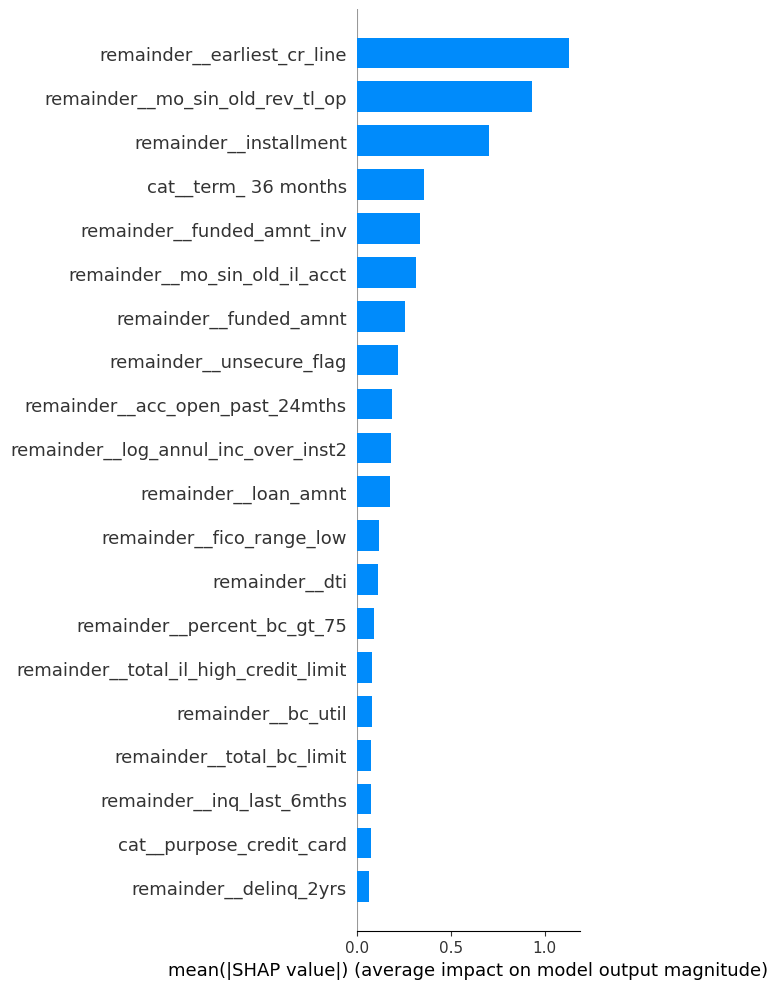

In [66]:
shap.summary_plot(shap_values, data, plot_type="bar", plot_size=(6,10))

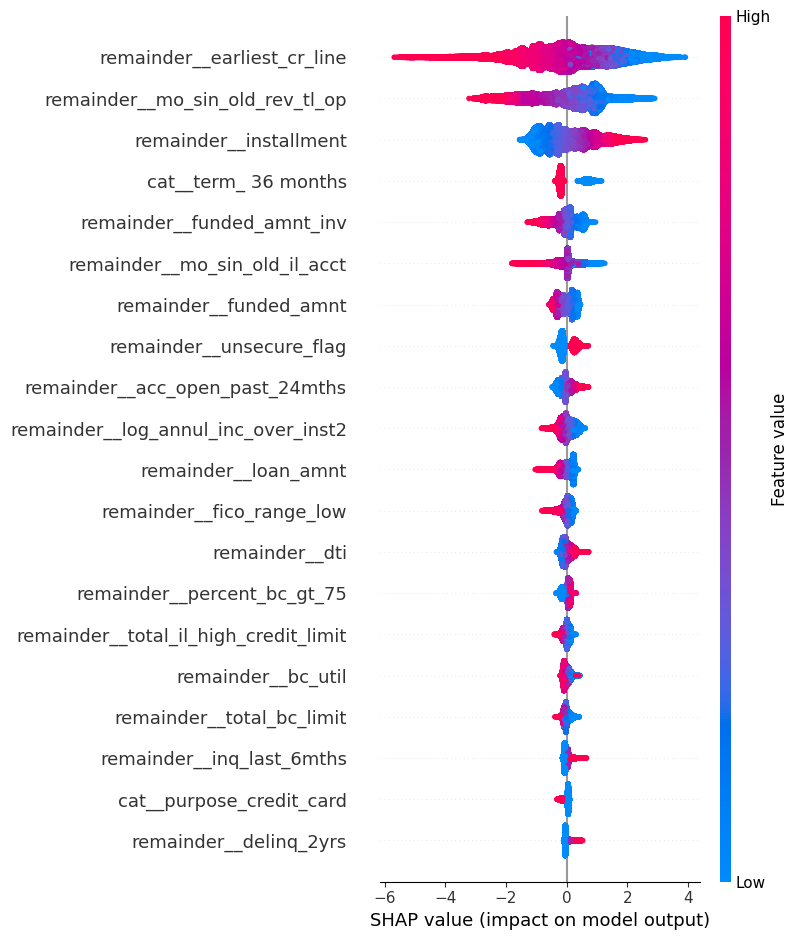

In [6]:
shap.summary_plot(shap_values,                       # The Shapley values.
                  data, # The training sample
                  show=False)                        # Whether to print the model or not

# Let's save this as a PDF for later use.
plt.savefig('ShapSummaryPlot.pdf', dpi=300, bbox_inches='tight')
plt.show()

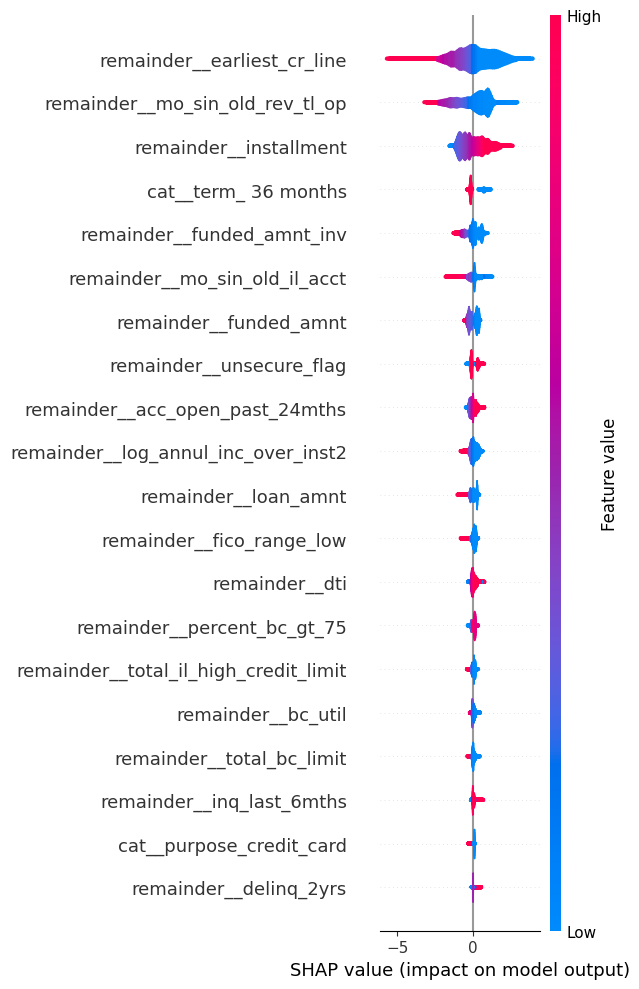

<Figure size 640x480 with 0 Axes>

In [67]:
shap.summary_plot(shap_values,                       # The Shapley values.
                  data, # The training sample
                  show=True,
                  plot_type="violin",
                  plot_size = (6,10))                        # Whether to print the model or not

# Let's save this as a PDF for later use.
plt.savefig('ShapSummaryPlot_violin.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__earliest_cr_line`

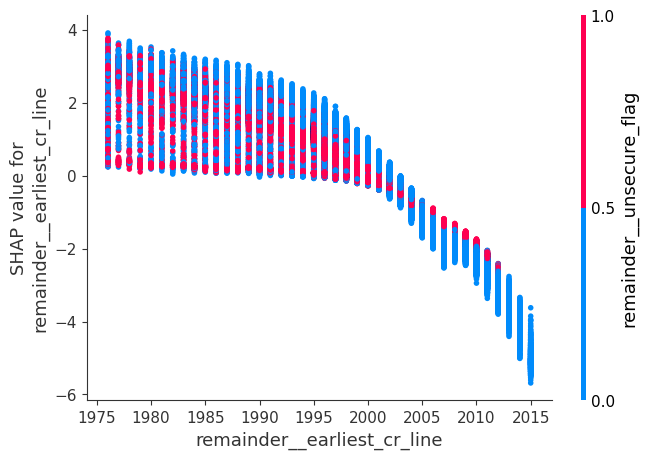

In [94]:
shap.dependence_plot(
    "remainder__earliest_cr_line",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=True                     # Whether to print the model or not
)                               
plt.show()

# `remainder__mo_sin_old_rev_tl_op`

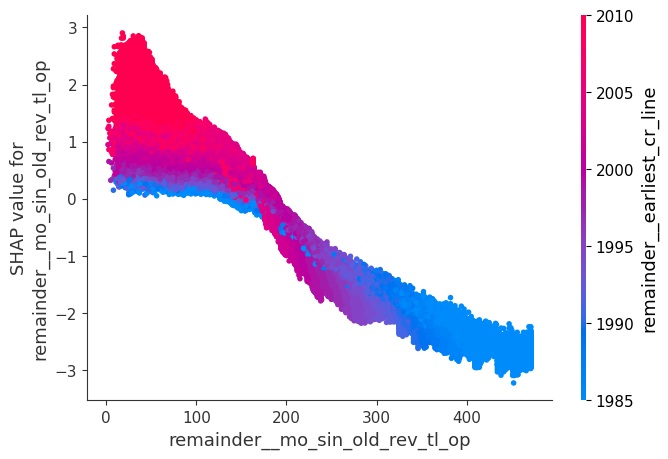

In [95]:
shap.dependence_plot(
    "remainder__mo_sin_old_rev_tl_op",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('2_remainder__mo_sin_old_rev_tl_op.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__installment`

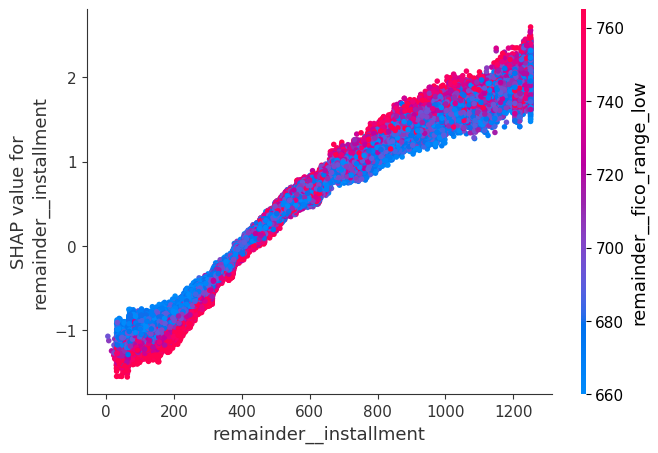

In [96]:
shap.dependence_plot(
    "remainder__installment",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('3_remainder__installment.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__funded_amnt`

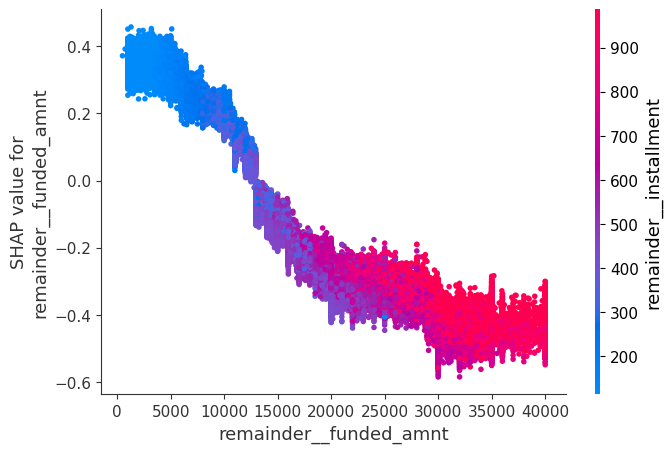

In [97]:
shap.dependence_plot(
    "remainder__funded_amnt",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('4_remainder__funded_amnt.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `cat__term_ 36 months`

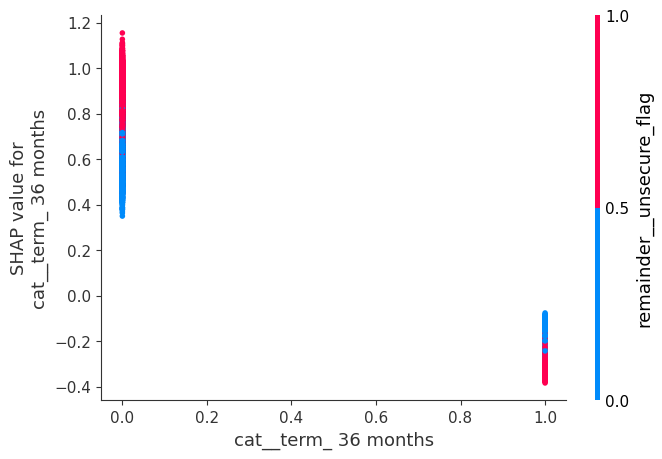

In [98]:
shap.dependence_plot(
    "cat__term_ 36 months",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('5_cat__term_ 36 months.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__mo_sin_old_il_acct`

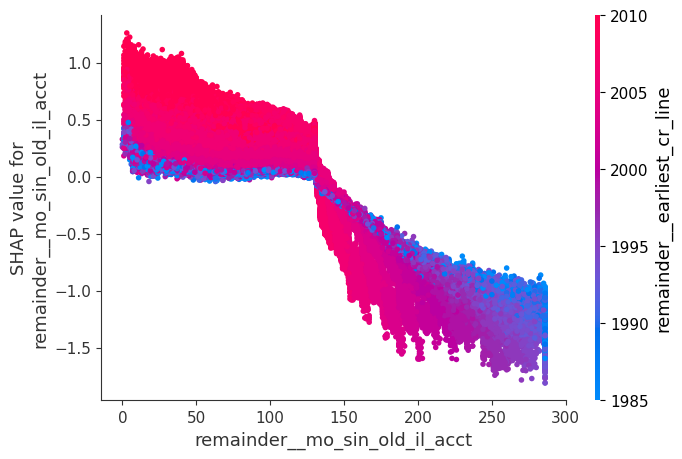

In [99]:
shap.dependence_plot(
    "remainder__mo_sin_old_il_acct",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('6_remainder__mo_sin_old_il_acct.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__subordinate_flag`

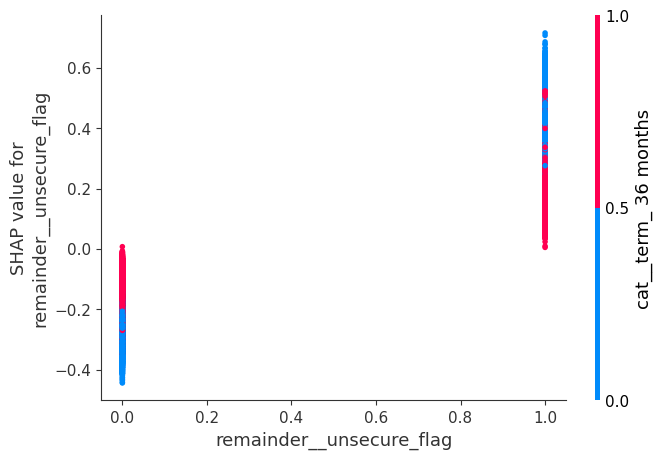

In [100]:
shap.dependence_plot(
    "remainder__unsecure_flag",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('7_remainder__subordinate_flag.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__acc_open_past_24mths`

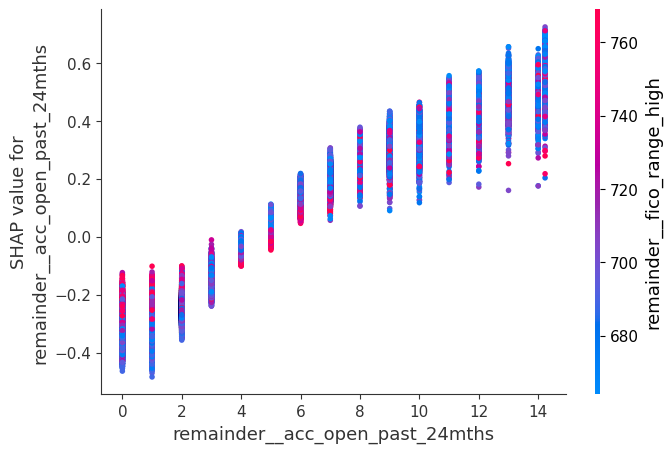

In [101]:
shap.dependence_plot(
    "remainder__acc_open_past_24mths",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('8_remainder__acc_open_past_24mths.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__log_annul_inc_over_inst2`

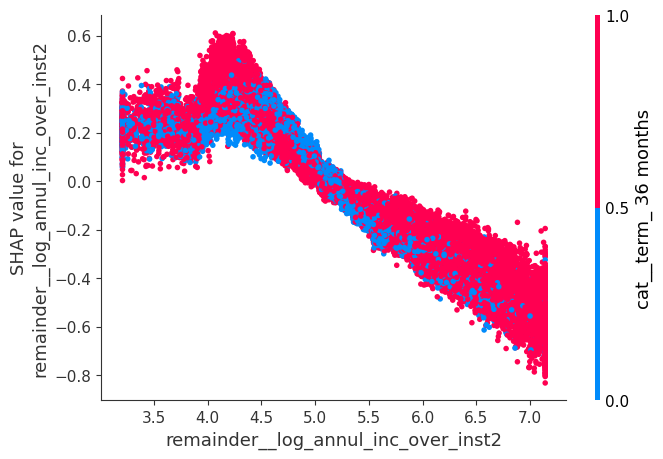

In [102]:
shap.dependence_plot(
    "remainder__log_annul_inc_over_inst2",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('9_remainder__log_annul_inc_over_inst2.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__funded_amnt_inv`

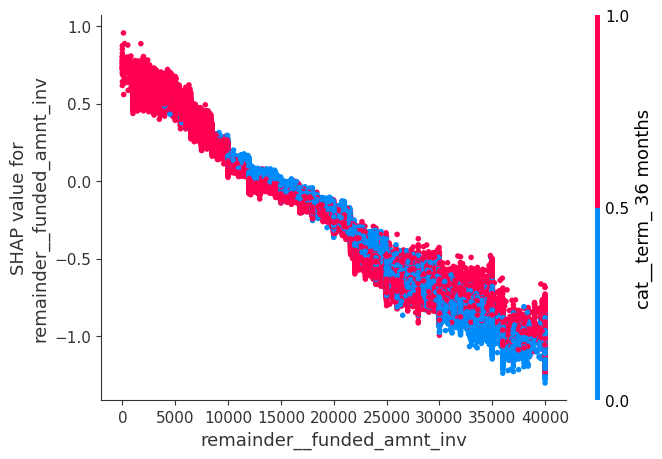

In [103]:
shap.dependence_plot(
    "remainder__funded_amnt_inv",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('10_remainder__funded_amnt_inv.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__fico_range_high`

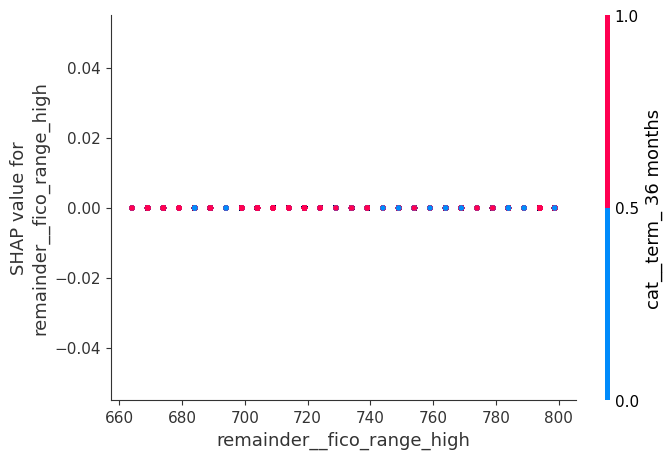

In [104]:
shap.dependence_plot(
    "remainder__fico_range_high",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('11_remainder__fico_range_high.pdf', dpi=300, bbox_inches='tight')
plt.show()

# `remainder__dti`

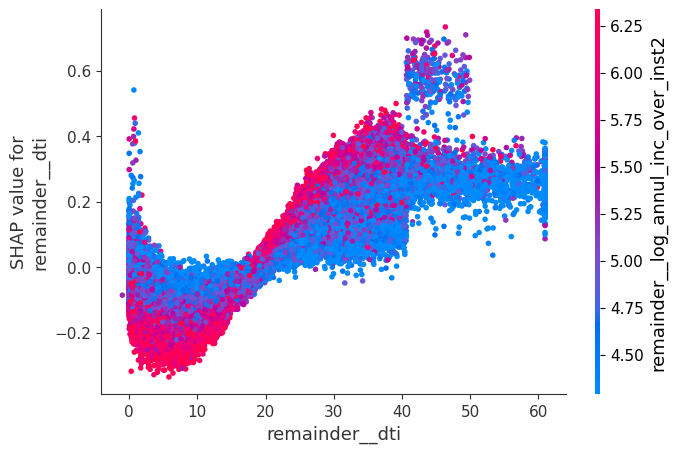

In [105]:
shap.dependence_plot(
    "remainder__dti",  # The variable to study
    shap_values,                    # The Shapley values.
    data,                           # The training sample
    show=False                      # Whether to print the model or not
)                               
plt.savefig('12_remainder__dti.pdf', dpi=300, bbox_inches='tight')
plt.show()

# Q5 Part 2: Comparison with Logistic Regression Model

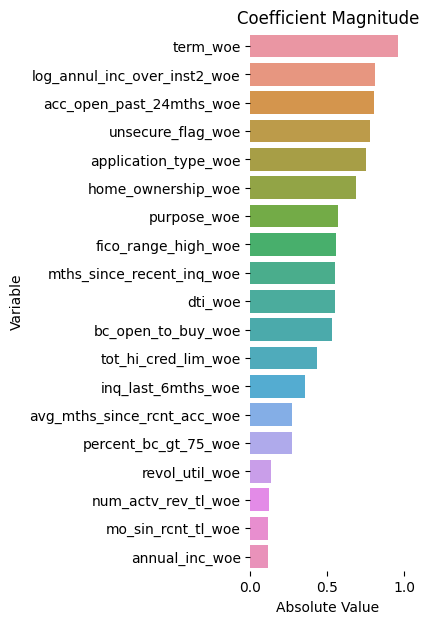

In [106]:
coef_df = pd.DataFrame({"Variable": X_train_refit.columns, "(Absolute)Coefficient": np.abs(pd_model.coef_.flatten())})
coef_importance_df = coef_df.sort_values(by="(Absolute)Coefficient", ascending=False)

f, ax = plt.subplots(figsize=(2, 7))
plt.title("Coefficient Magnitude")
sns.barplot(y=coef_importance_df["Variable"], x=coef_importance_df["(Absolute)Coefficient"], 
            label="Total")
ax.set(ylabel="Variable",
       xlabel="Absolute Value")
sns.despine(left=True, bottom=True)

# Q5 Complete

In [108]:
pickle.dump(shap_values, open('Q5_shap_values.pkl', 'wb'))
pickle.dump(data, open('Q5_shap_data.pkl', 'wb'))